# Save annual data

Save annual-mean data.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import glob
import os.path
from multiprocessing import Pool

import feather as ft
import matplotlib.pyplot as plt
import pandas as pd
import scmdata
import seaborn as sns
import tqdm.autonotebook as tqdman

import config

<ipython-input-2-037f2963101a>:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
ID = config.ID

<IPython.core.display.Javascript object>

In [4]:
plt.rcParams["figure.figsize"] = (12, 8)

<IPython.core.display.Javascript object>

In [5]:
OUT_DIR = "{}-feather-files".format(ID)
!mkdir -p {OUT_DIR}
OUT_DIR

'20210416-feather-files'

<IPython.core.display.Javascript object>

In [6]:
STITCHED_DIR = "./{}-country-crunch-stitched".format(ID)
STITCHED_NORMALISED_DIR = "./{}-country-crunch-stitched-normalised".format(ID)

STITCHED_DIR = "./{}-country-crunch-stitched-popn-weighted".format(ID)
STITCHED_NORMALISED_DIR = (
    "./{}-country-crunch-stitched-normalised-popn-weighted".format(ID)
)

MAX_WORKERS = 60

<IPython.core.display.Javascript object>

In [7]:
load_dir = STITCHED_DIR
# load_dir = STITCHED_NORMALISED_DIR

<IPython.core.display.Javascript object>

In [8]:
crunched_files = [
    f
    for f in glob.glob(os.path.join(load_dir, "**", "*.nc"), recursive=True)
    if "ssp" in f
]
crunched_files[:2]
display(len(crunched_files))
crunched_files

422

['./20210416-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_CanESM5_ssp245_r1i1p1f1_gn_185001-210012.nc',
 './20210416-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_CESM2-WACCM_ssp585_r4i1p1f1_gn_185001-210012.nc',
 './20210416-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_CESM2-WACCM_ssp126_r1i1p1f1_gn_185001-210012.nc',
 './20210416-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_NESM3_ssp245_r1i1p1f1_gn_185001-210012.nc',
 './20210416-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_IPSL-CM6A-LR_ssp460_r2i1p1f1_gr_185001-210012.nc',
 './20210416-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_CanESM5_ssp119_r10i1p1f1_gn_185001-210012.nc',
 './20210416-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_EC-Earth3-Veg_ssp119_r1i1p1f1_gr_185001-210012.nc',
 './20210416-country-crunch-stitched-popn-weighted/netcdf-scm_tas_Amon_CanESM5_ssp370_r1i1p1f1_gn_185001-210012.nc',
 './20210416-country-crunch-stitched-popn-weig

<IPython.core.display.Javascript object>

In [9]:
# [f for f in crunched_files if "CM4" in f]

<IPython.core.display.Javascript object>

In [10]:
dud_files = [
    "{}/netcdf-scm_tas_Amon_MRI-ESM2-0_ssp370-lowNTCF_r1i1p1f1_gn_185001-205512.nc".format(
        load_dir
    )
]
crunched_files = [f for f in crunched_files if f not in dud_files]

<IPython.core.display.Javascript object>

In [11]:
def load_file(f):
    return scmdata.ScmRun.from_nc(f)


all_dat = []
with Pool(MAX_WORKERS) as pool:
    all_dat = pool.map(load_file, crunched_files)

all_dat = scmdata.run_append(
    [scmdata.ScmRun(s.timeseries(time_axis="year-month")) for s in tqdman.tqdm(all_dat)]
)

/data/ubuntu-znicholls/miniconda3/envs/cmip6-country-level-processing/lib/python3.8/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])
/data/ubuntu-znicholls/miniconda3/envs/cmip6-country-level-processing/lib/python3.8/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_variable(ds.variables["time"])
/data/ubuntu-znicholls/miniconda3/envs/cmip6-country-level-processing/lib/python3.8/site-packages/scmdata/netcdf.py:201: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dims["time"] = _read_time_varia

  0%|          | 0/422 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [12]:
cms = all_dat.get_unique_meta("climate_model")
display(len(cms))
sorted(cms)

47

['ACCESS-CM2',
 'ACCESS-ESM1-5',
 'AWI-CM-1-1-MR',
 'BCC-CSM2-MR',
 'CAMS-CSM1-0',
 'CAS-ESM2-0',
 'CESM2',
 'CESM2-WACCM',
 'CIESM',
 'CMCC-CM2-SR5',
 'CMCC-ESM2',
 'CNRM-CM6-1',
 'CNRM-CM6-1-HR',
 'CNRM-ESM2-1',
 'CanESM5',
 'CanESM5-CanOE',
 'E3SM-1-1',
 'EC-Earth3',
 'EC-Earth3-AerChem',
 'EC-Earth3-CC',
 'EC-Earth3-Veg',
 'EC-Earth3-Veg-LR',
 'FGOALS-g3',
 'FIO-ESM-2-0',
 'GFDL-CM4',
 'GFDL-ESM4',
 'GISS-E2-1-G',
 'HadGEM3-GC31-LL',
 'HadGEM3-GC31-MM',
 'IITM-ESM',
 'INM-CM4-8',
 'INM-CM5-0',
 'IPSL-CM5A2-INCA',
 'IPSL-CM6A-LR',
 'KACE-1-0-G',
 'KIOST-ESM',
 'MCM-UA-1-0',
 'MIROC-ES2L',
 'MIROC6',
 'MPI-ESM-1-2-HAM',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0',
 'NESM3',
 'NorESM2-LM',
 'NorESM2-MM',
 'TaiESM1',
 'UKESM1-0-LL']

<IPython.core.display.Javascript object>

In [13]:
all_dat_annual_mean = all_dat.time_mean("AC")
all_dat_annual_mean

<scmdata.ScmRun (timeseries: 189140, timepoints: 451)>
Time:
	Start: 1850-07-01T00:00:00
	End: 2300-07-01T00:00:00
Meta:
	        activity_id climate_model grid member_id mip_era        model  \
	0       ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	1       ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	2       ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	3       ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	4       ScenarioMIP       CanESM5   gn  r1i1p1f1   CMIP6  unspecified   
	...             ...           ...  ...       ...     ...          ...   
	189135  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	189136  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	189137  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	189138  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspecified   
	189139  ScenarioMIP    NorESM2-LM   gn  r1i1p1f1   CMIP6  unspec

<IPython.core.display.Javascript object>

In [14]:
for cmdf in all_dat_annual_mean.groupby("climate_model"):
    climate_model = cmdf.get_unique_meta("climate_model", True)
    out = cmdf.timeseries(time_axis="year").reset_index()
    out_file_name = os.path.join(
        OUT_DIR, "{}_{}_regional-means.feather".format(ID, climate_model)
    )
    ft.write_dataframe(out, out_file_name)
    !du -sh {out_file_name}

5.2M	20210416-feather-files/20210416_ACCESS-CM2_regional-means.feather
5.5M	20210416-feather-files/20210416_ACCESS-ESM1-5_regional-means.feather
4.6M	20210416-feather-files/20210416_AWI-CM-1-1-MR_regional-means.feather
2.0M	20210416-feather-files/20210416_BCC-CSM2-MR_regional-means.feather
4.4M	20210416-feather-files/20210416_CAMS-CSM1-0_regional-means.feather
3.8M	20210416-feather-files/20210416_CAS-ESM2-0_regional-means.feather
5.6M	20210416-feather-files/20210416_CESM2_regional-means.feather
5.3M	20210416-feather-files/20210416_CESM2-WACCM_regional-means.feather
1.7M	20210416-feather-files/20210416_CIESM_regional-means.feather
2.0M	20210416-feather-files/20210416_CMCC-CM2-SR5_regional-means.feather
2.0M	20210416-feather-files/20210416_CMCC-ESM2_regional-means.feather
2.0M	20210416-feather-files/20210416_CNRM-CM6-1_regional-means.feather
2.1M	20210416-feather-files/20210416_CNRM-CM6-1-HR_regional-means.feather
2.9M	20210416-feather-files/20210416_CNRM-ESM2-1_regional-means.feather
22

<IPython.core.display.Javascript object>

In [15]:
del all_dat_annual_mean

<IPython.core.display.Javascript object>

## How to work with the data

In [16]:
all_dat_annual_mean_loaded = scmdata.ScmRun(pd.read_feather(out_file_name))
all_dat_annual_mean_loaded

<scmdata.ScmRun (timeseries: 3171, timepoints: 451)>
Time:
	Start: 1850-01-01T00:00:00
	End: 2300-01-01T00:00:00
Meta:
	      activity_id climate_model grid member_id mip_era        model  \
	0     ScenarioMIP   UKESM1-0-LL   gn  r1i1p1f2   CMIP6  unspecified   
	1     ScenarioMIP   UKESM1-0-LL   gn  r1i1p1f2   CMIP6  unspecified   
	2     ScenarioMIP   UKESM1-0-LL   gn  r1i1p1f2   CMIP6  unspecified   
	3     ScenarioMIP   UKESM1-0-LL   gn  r1i1p1f2   CMIP6  unspecified   
	4     ScenarioMIP   UKESM1-0-LL   gn  r1i1p1f2   CMIP6  unspecified   
	...           ...           ...  ...       ...     ...          ...   
	3166  ScenarioMIP   UKESM1-0-LL   gn  r1i1p1f2   CMIP6  unspecified   
	3167  ScenarioMIP   UKESM1-0-LL   gn  r1i1p1f2   CMIP6  unspecified   
	3168  ScenarioMIP   UKESM1-0-LL   gn  r1i1p1f2   CMIP6  unspecified   
	3169  ScenarioMIP   UKESM1-0-LL   gn  r1i1p1f2   CMIP6  unspecified   
	3170  ScenarioMIP   UKESM1-0-LL   gn  r1i1p1f2   CMIP6  unspecified   
	
	              

<IPython.core.display.Javascript object>

In [17]:
sorted(all_dat_annual_mean_loaded["region"].unique())

['Nearest World',
 'Nearest World|Natural Earth 50m|Afghanistan',
 'Nearest World|Natural Earth 50m|Albania',
 'Nearest World|Natural Earth 50m|Algeria',
 'Nearest World|Natural Earth 50m|American Samoa',
 'Nearest World|Natural Earth 50m|Andorra',
 'Nearest World|Natural Earth 50m|Angola',
 'Nearest World|Natural Earth 50m|Anguilla',
 'Nearest World|Natural Earth 50m|Antarctica',
 'Nearest World|Natural Earth 50m|Antigua and Barb.',
 'Nearest World|Natural Earth 50m|Argentina',
 'Nearest World|Natural Earth 50m|Armenia',
 'Nearest World|Natural Earth 50m|Aruba',
 'Nearest World|Natural Earth 50m|Ashmore and Cartier Is.',
 'Nearest World|Natural Earth 50m|Australia',
 'Nearest World|Natural Earth 50m|Austria',
 'Nearest World|Natural Earth 50m|Azerbaijan',
 'Nearest World|Natural Earth 50m|Bahamas',
 'Nearest World|Natural Earth 50m|Bahrain',
 'Nearest World|Natural Earth 50m|Bangladesh',
 'Nearest World|Natural Earth 50m|Barbados',
 'Nearest World|Natural Earth 50m|Belarus',
 'Nearest

<IPython.core.display.Javascript object>

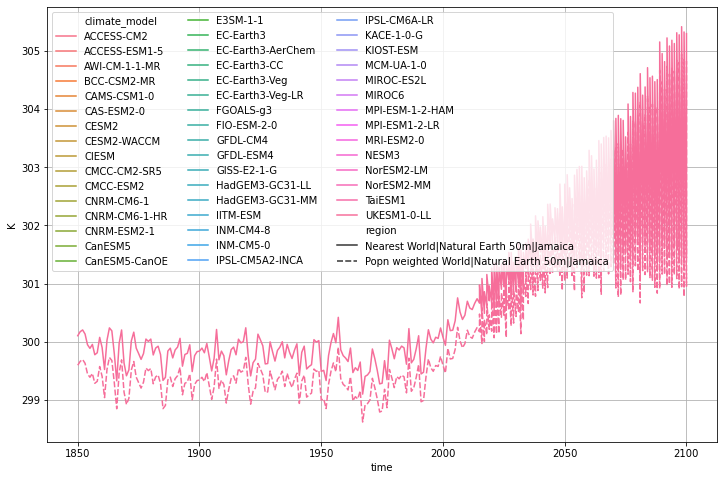

<IPython.core.display.Javascript object>

In [18]:
ax = (
    all_dat_annual_mean_loaded.filter(region="*World|*Jamaica")
    #     .filter(scenario=["ssp119", "ssp126", "ssp245"])
    #     .filter(scenario="ssp245")
    #     .filter(climate_model="TaiESM1")
    .lineplot(
        style="region",
        hue="climate_model",
        hue_order=sorted(cms),
        units="member_id",
        estimator=None,
        time_axis="year-month",
    )
)
ax.legend(loc="upper left", ncol=3)
ax.grid()

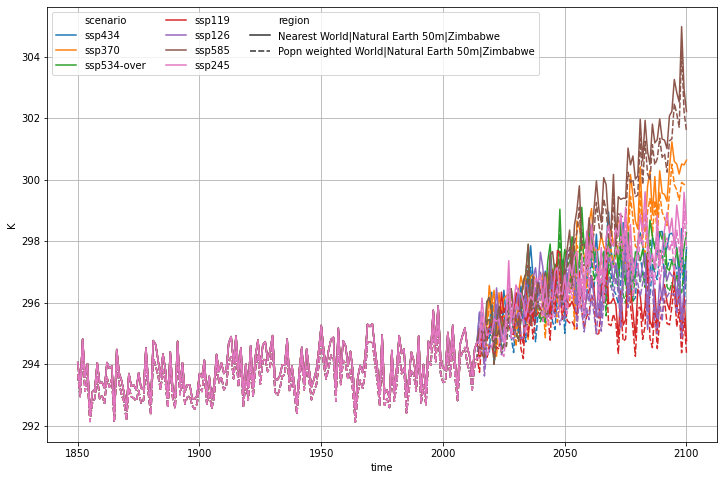

<IPython.core.display.Javascript object>

In [19]:
ax = (
    all_dat_annual_mean_loaded.filter(region="*World*Zimbabwe*")
    #     .filter(scenario=["ssp119", "ssp126", "ssp245"])
    #     .filter(climate_model="MIROC6")
    .lineplot(
        hue="scenario",
        style="region",
        units="member_id",
        estimator=None,
        time_axis="year-month",
    )
)
ax.legend(loc="upper left", ncol=3)
ax.grid()
# ax.axvline(2014.5)

In [20]:
mean_years = range(2081, 2100 + 1)
# mean_years = range(2021, 2040 + 1)
val_col = "{}-{} mean".format(mean_years[0], mean_years[-1])
bardf = (
    all_dat_annual_mean_loaded.filter(year=mean_years)
    .timeseries(time_axis="year")
    .mean(axis="columns")
    .reset_index()
    .rename({0: val_col}, axis="columns")
)
bardf

,activity_id,climate_model,grid,member_id,mip_era,model,region,scenario,unit,variable,variable_standard_name,2081-2100 mean
0,ScenarioMIP,UKESM1-0-LL,gn,r1i1p1f2,CMIP6,unspecified,Nearest World,ssp434,K,tas,air_temperature,290.070223
1,ScenarioMIP,UKESM1-0-LL,gn,r1i1p1f2,CMIP6,unspecified,Nearest World|Natural Earth 50m|Afghanistan,ssp434,K,tas,air_temperature,287.036916
2,ScenarioMIP,UKESM1-0-LL,gn,r1i1p1f2,CMIP6,unspecified,Nearest World|Natural Earth 50m|Albania,ssp434,K,tas,air_temperature,290.434366
3,ScenarioMIP,UKESM1-0-LL,gn,r1i1p1f2,CMIP6,unspecified,Nearest World|Natural Earth 50m|Algeria,ssp434,K,tas,air_temperature,298.142483
4,ScenarioMIP,UKESM1-0-LL,gn,r1i1p1f2,CMIP6,unspecified,Nearest World|Natural Earth 50m|American Samoa,ssp434,K,tas,air_temperature,302.391049
...,...,...,...,...,...,...,...,...,...,...,...,...
3166,ScenarioMIP,UKESM1-0-LL,gn,r1i1p1f2,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|W. Sahara,ssp245,K,tas,air_temperature,290.093288
3167,ScenarioMIP,UKESM1-0-LL,gn,r1i1p1f2,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|Yemen,ssp245,K,tas,air_temperature,303.025162
3168,ScenarioMIP,UKESM1-0-LL,gn,r1i1p1f2,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|Zambia,ssp245,K,tas,air_temperature,298.733753
3169,ScenarioMIP,UKESM1-0-LL,gn,r1i1p1f2,CMIP6,unspecified,Popn weighted World|Natural Earth 50m|Zimbabwe,ssp245,K,tas,air_temperature,297.660443


<IPython.core.display.Javascript object>

In [21]:
tmp = bardf[bardf["region"] == "Nearest World"][
    ["scenario", "climate_model"]
].drop_duplicates()
display(tmp["scenario"].value_counts())
tmp

ssp126         1
ssp585         1
ssp370         1
ssp434         1
ssp245         1
ssp119         1
ssp534-over    1
Name: scenario, dtype: int64

,scenario,climate_model
0,ssp434,UKESM1-0-LL
453,ssp370,UKESM1-0-LL
906,ssp534-over,UKESM1-0-LL
1359,ssp119,UKESM1-0-LL
1812,ssp126,UKESM1-0-LL
2265,ssp585,UKESM1-0-LL
2718,ssp245,UKESM1-0-LL


<IPython.core.display.Javascript object>

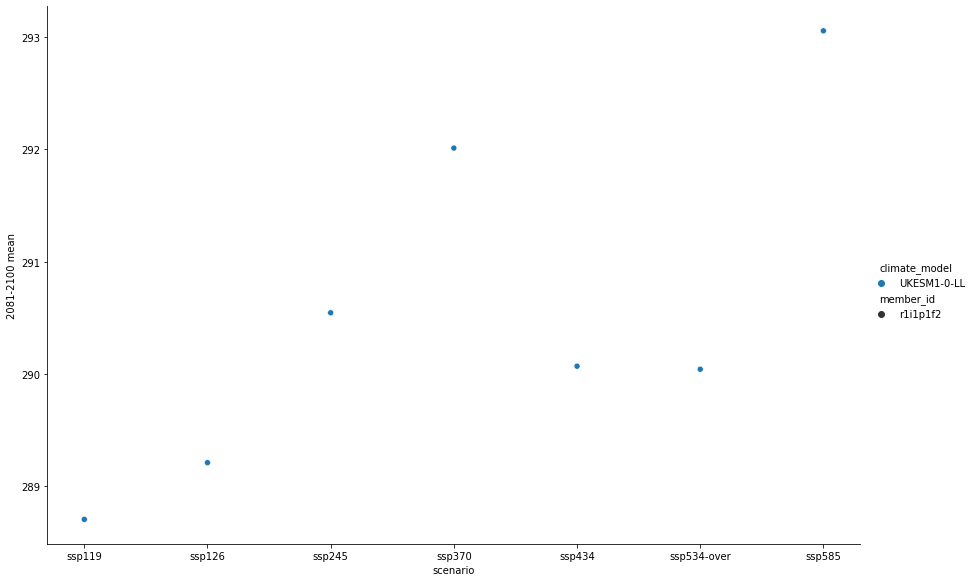

<IPython.core.display.Javascript object>

In [22]:
sns.relplot(
    data=bardf[bardf["region"] == "Nearest World"].sort_values(by="scenario"),
    #     x="climate_model",
    #     y="value",
    #     hue="scenario",
    x="scenario",
    y=val_col,
    hue="climate_model",
    hue_order=sorted(bardf["climate_model"].unique().tolist()),
    style="member_id",
    style_order=sorted(bardf["member_id"].unique().tolist()),
    #     estimator="median",
    height=8,
    aspect=1.5,
    #     kind="line",
    #     marker="x",
)

In [23]:
mean_years = range(2081, 2100 + 1)
# mean_years = range(2021, 2040 + 1)
val_col = "{}-{} mean".format(mean_years[0], mean_years[-1])
bardf = (
    all_dat.filter(year=mean_years)
    .time_mean("AC")
    .timeseries(time_axis="year")
    .mean(axis="columns")
    .reset_index()
    .rename({0: val_col}, axis="columns")
)
bardf["Population weighted"] = bardf["region"].str.contains("Popn weighted")
bardf["region"] = bardf["region"].str.replace("Popn weighted ", "")
bardf

,activity_id,climate_model,grid,member_id,mip_era,model,region,scenario,unit,variable,variable_standard_name,2081-2100 mean,Population weighted
0,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Nearest World,ssp245,K,tas,air_temperature,290.880890,False
1,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Afghanistan,ssp245,K,tas,air_temperature,287.730572,False
2,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Albania,ssp245,K,tas,air_temperature,292.073480,False
3,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|Algeria,ssp245,K,tas,air_temperature,298.799341,False
4,ScenarioMIP,CanESM5,gn,r1i1p1f1,CMIP6,unspecified,Nearest World|Natural Earth 50m|American Samoa,ssp245,K,tas,air_temperature,303.167983,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189135,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|W. Sahara,ssp126,K,tas,air_temperature,290.949736,True
189136,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Yemen,ssp126,K,tas,air_temperature,301.437643,True
189137,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Zambia,ssp126,K,tas,air_temperature,296.370544,True
189138,ScenarioMIP,NorESM2-LM,gn,r1i1p1f1,CMIP6,unspecified,World|Natural Earth 50m|Zimbabwe,ssp126,K,tas,air_temperature,296.606830,True


<IPython.core.display.Javascript object>

<ipython-input-24-6497382ecafc>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  fg.axes[0][0].set_xticklabels(fg.axes[0][0].get_xticklabels(), rotation=90)


done


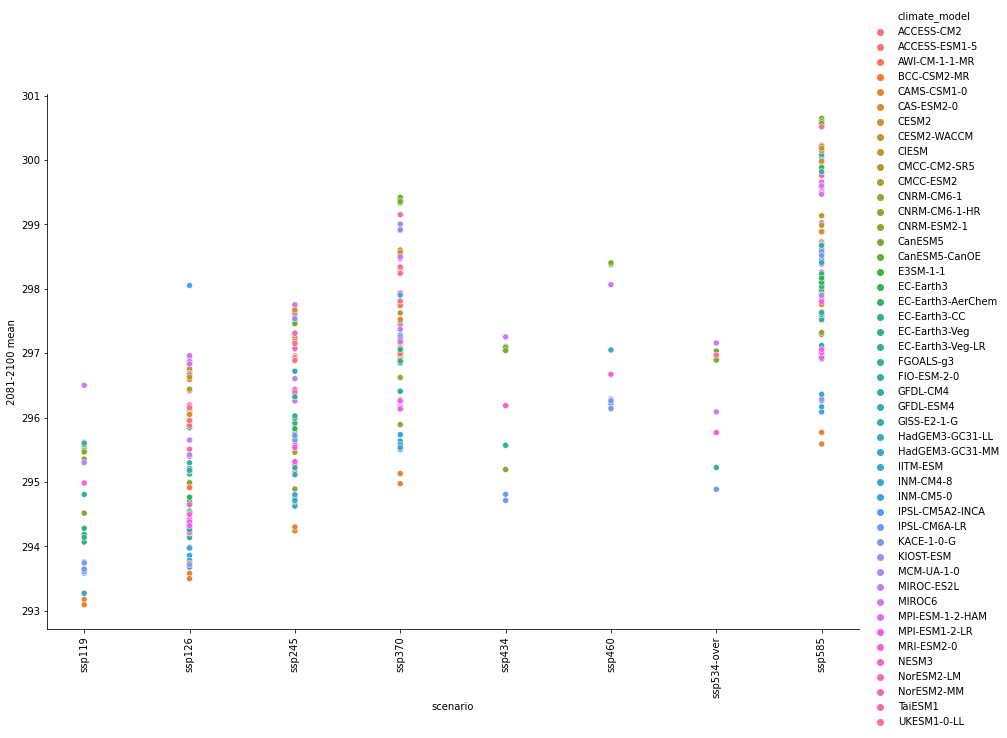

<IPython.core.display.Javascript object>

In [24]:
fg = sns.relplot(
    data=bardf[bardf["region"] == "World"].sort_values(by="scenario"),
    x="scenario",
    y=val_col,
    hue="climate_model",
    hue_order=sorted(bardf["climate_model"].unique().tolist()),
    height=8,
    aspect=1.5,
)
fg.axes[0][0].set_xticklabels(fg.axes[0][0].get_xticklabels(), rotation=90)
print("done")